In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import math
%matplotlib inline

Part 1

Даны вектора x=(1,1), y=(2, 0) и z = (0,2)

Изобразить вектора на экране


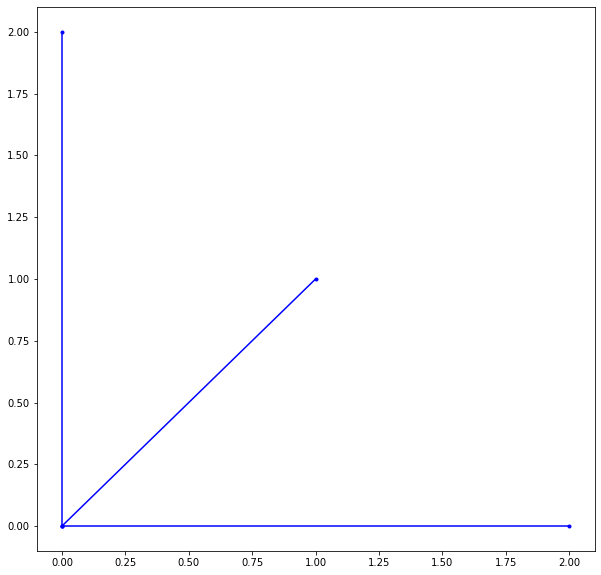

In [38]:
fig = plt.figure(figsize=(10, 10))

plt.plot([0,1],[0,1],c='b',marker='.')
plt.plot([0,2],[0,0], c='b',marker='.')
plt.plot([0,0],[0,2],c='b',marker='.')

plt.show()

Изобразить точку x + y + z


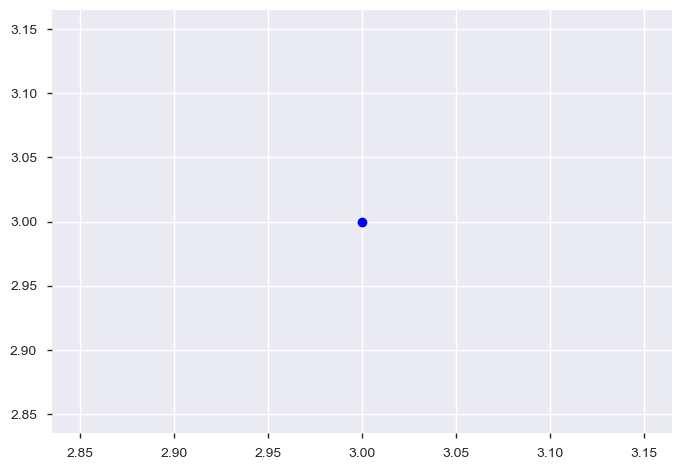

In [202]:
x = np.array([1,1])
y = np.array([2,0])
z = np.array([0,2])

k = x + y + z

plt.plot(k[0], k[1], c='b',marker='o')

plt.show()

Найти угол между векторами x и y

In [58]:
x_s = x * x
y_s = y * y
xy = x * y
len_x = math.sqrt(x_s[0] + x_s[1])
len_y = math.sqrt(y_s[0] + y_s[1])
math.acos((xy[0] + xy[1]) / (len_x * len_y))

0.7853981633974484

part 2

Даны дома из Бостона
Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)
Написать код разложения дома по указанному базису

In [77]:
from sklearn.datasets import load_boston
tmp = load_boston()
X = pd.DataFrame(tmp.data, columns=tmp.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [79]:
profile = ProfileReport(X)
profile

/Users/user/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,506
Total Missing (%),0.0%
Total size in memory,51.5 KiB
Average record size in memory,104.3 B
Numeric,11
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [180]:
rank_X = 1000
res = []

for i in range(len(X)):
    
    tmp_rank_X = np.linalg.matrix_rank(X[i:])
    
    if tmp_rank_X < rank_X:
        res.append(X.iloc[i].values)
        rank_X = tmp_rank_X
        

In [182]:
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,8.98296,0.0,18.10,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60
2,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77
3,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
4,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06
5,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
6,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
7,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
8,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
9,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08


In [200]:
np.linalg.matrix_rank(res)

13

In [201]:
# вектора в res - базисные тк rank(res) = 13

In [189]:
# разложение любого вектора k по базисным
k = res[0]
np.linalg.solve(np.transpose(res),  k)



array([ 1.00000000e+00,  7.23731397e-30,  2.02062006e-16, -1.76670075e-16,
       -3.20005054e-17, -4.78128171e-15,  1.48968409e-14, -1.02168010e-14,
        1.48051782e-14, -3.20995272e-14,  2.63953428e-14, -3.21538935e-14,
        2.31789462e-14])